## Experiments with LLM/Transformers

Let's start with a few terms

* **Transformers** : A transformer is a type of neural network architecture introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. Transformers are designed to process sequences of data, such as sentences in natural language, and have since become a fundamental building block in various deep learning applications.
* **LLMs** :  a large language model, like GPT-3 (Generative Pre-trained Transformer 3), is a specific implementation of a transformer architecture that has been pre-trained on a massive amount of text data to perform language-related tasks. GPT-3, for instance, is a powerful language model developed by OpenAI that can generate coherent and contextually relevant text given a prompt. It can be fine-tuned for specific tasks, such as translation, summarization, question answering, and more.
* **Embeddings** : An embedding is a way to represent and encode objects, such as words or items, as vectors in a continuous vector space. Embeddings are commonly used in machine learning and natural language processing (NLP) to capture semantic relationships and similarities between objects.
* **Vector** : an embedding is essentially a vector, but the term "embedding" is often used in the context of machine learning to emphasize the idea that objects are being placed into a continuous vector space for the purpose of capturing meaningful relationships and patterns.

*Source : Responses from questions to OpenAI ChatGPT*

We'll be using Python (3.11), Pytorch (a Machine Learning Library), SentenceTransformer (A tool to generate text and image embeddings based on Pytorch) and a few other utilities (PIL, Matplotlib, Numpy) to help display 
some of the objects we'll be using.

#### Load the needed Python libraries
The first step is to simply import the libraries we'll be using through the tests.

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sentence_transformers import SentenceTransformer, util

In these examples, we'll be using the [clip-ViT-B-32](https://huggingface.co/sentence-transformers/clip-ViT-B-32) model (about 500MB in size). This is an Image and Text model, which maps text and images to a shared vector space. This allows us to ask questions in natural language and return images in response. The SentenceTransformer library we are using simplifies the use of the clip-ViT-B-32 model.  As in the previous examples, we first load the needed libraries and then the model.

In [2]:
model = SentenceTransformer('clip-ViT-B-32')

The next step is to use the model to encode a set of images of cats, dogs and fruit into embeddings. The model encodes the images into vectors of 512 floating point numbers (an embedding). Other models may encode objects into fewer or greater numbers of dimensions. I'm storing the results of these embeddings along with a description and the location of the file storing them. It's **important to note** that this model is **NOT** specialised for cats, dogs, or even fruit. It can look for similarities across many objects and associated text. 

In [3]:
embeddings = [
    ['dog1', 'images/dog1.png', model.encode(Image.open('images/dog1.png'))],
    ['dog2', 'images/dog2.png', model.encode(Image.open('images/dog2.png'))],
    ['dog3', 'images/dog3.png', model.encode(Image.open('images/dog3.png'))],
    ['dog4', 'images/dog4.png', model.encode(Image.open('images/dog4.png'))],
    ['cat1', 'images/cat1.png', model.encode(Image.open('images/cat1.png'))],
    ['cat2', 'images/cat2.png', model.encode(Image.open('images/cat2.png'))],
    ['cat3', 'images/cat3.png', model.encode(Image.open('images/cat3.png'))],
    ['apple', 'images/apple.png', model.encode(Image.open('images/apple.png'))],
    ['banana', 'images/banana.png', model.encode(Image.open('images/banana.png'))],
    ['orange', 'images/orange.png', model.encode(Image.open('images/orange.png'))],
]

We can take a look at an embedding. To us, it is meaningless and impossible to determine what it represents. 

In [4]:
embeddings[0][2]

array([ 4.78186846e-01,  2.05570519e-01, -3.64918500e-01,  9.87464488e-02,
        7.69032761e-02, -7.47148752e-01,  2.46305898e-01,  1.55674428e-01,
        6.48719430e-01,  3.66886258e-01, -1.32061481e-01, -2.34934866e-01,
        9.05221224e-01,  1.82910562e-02,  6.15863621e-01,  1.34729996e-01,
        1.21231806e+00,  2.31546313e-01, -1.66024670e-01, -4.53068733e-01,
       -7.24944398e-02,  2.17734575e-01,  5.62953711e-01, -2.16946915e-01,
       -2.93470323e-01,  3.83318305e-01,  7.26407468e-01, -8.19184482e-02,
       -4.12652344e-02, -3.29822212e-01,  1.27520442e-01,  3.30836892e-01,
       -1.02706045e-01, -1.11707844e-01, -2.93315053e-02,  4.75832224e-01,
        4.39907253e-01,  4.12551939e-01, -2.74156094e-01,  1.22905302e+00,
       -7.81089008e-01,  8.75096768e-02,  3.45077842e-01, -4.81127828e-01,
        2.93136686e-02, -1.29634976e+00, -3.16707969e-01,  3.51953134e-03,
       -1.44380093e-01, -3.44693065e-02,  3.41486245e-01,  2.42753357e-01,
       -1.33946896e-01,  

In [6]:
stats.describe(embeddings[0][2])

DescribeResult(nobs=512, minmax=(-6.404296, 1.5256798), mean=0.0015358673, variance=0.22052721594644384, skewness=-4.833696548914187, kurtosis=66.59330721773782)

For clarity we can show what the images show

In [7]:
def image_grid(imgs):
    """Load and show images in a grid from a list of paths"""
    count = len(imgs)
    plt.figure(figsize=(20, 30))
    for ix, path in enumerate(imgs):
        i = Image.open(path)
        plt.subplots_adjust(bottom=0.3, right=0.8, top=0.5)
        ax = plt.subplot(3, 8, ix + 1)
        ax.axis('off')
        plt.imshow(i)

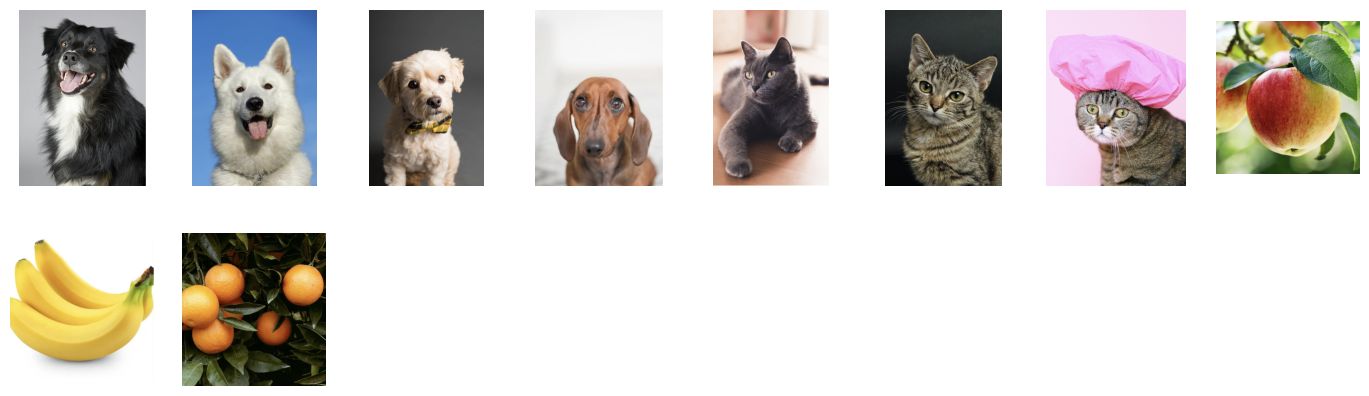

In [8]:
image_grid([image[1] for image in embeddings])

To determine the similarity between the images we can use a number of approaches. Two common approaches used are the dot product and cosine similarity.
* **Dot Product** : Given two vectors *A* and *B*. *A.B* is calculated by multiplying the corresponding elements of the vectors and summing the results.
* **Cosine Similarity** : This formula essentially measures the cosine of the angle between the vectors. A higher cosine similarity indicates a smaller angle and, therefore, greater similarity. The closer to 1 the calculation is the more similar they are.

Using a cosine calculation we can compare the similarity between two dogs.

In [9]:
# Dog 1 compared to Dog 2
util.cos_sim(embeddings[0][2],embeddings[1][2]).item()

0.8393607139587402

We can also compare how similar a cat is to another dog

In [10]:
# Dog2 compared to Cat3
util.cos_sim(embeddings[2][2],embeddings[6][2]).item()

0.666096568107605

#### Plotting the similarity to all of the cats, dogs and fruit!
One of the problems with visualising the similarity between the embeddings in a way that a human can understand is that they are multi-dimensional. For the model we are using that means each embedding has 512 dimensions. Even plotting them into a quasi-3-dimensional plot won't help us. However, we can use a *"[T-distributed Stochastic Neighbor Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)"* function to try and make some sense of the data. The TSNE function allows us to project all 512 dimensions to a simple 2-dimensional cartesian coordinate system. **NOTE** As the data changes the resulting projection will change.

What we can see is that we end up with a clustering of the data. "Cats" are clustered together, as are dogs, but fruit is clustered further from our furry friends.

In [11]:
def plot_embedding_distribution(embeddings_np, search_question, search_embedding, labels):
    from sklearn.manifold import TSNE
    plt.style.use("seaborn-v0_8")
    plt.rcParams['figure.dpi'] = 300

    colours = ['blue' for l in labels]
    scales = [40.0 for l in labels]
    if search_question is not None:
        embeddings_np = np.append(embeddings_np, [search_embedding], axis=0)
        labels.append(f'"{search_question}"')
        colours.append('red')
        scales = [util.cos_sim(e, search_embedding).item()*50 for e in embeddings_np]
    
    data = TSNE(n_components=2, learning_rate='auto', random_state=42, init='pca', perplexity=4).fit_transform(embeddings_np)
    x = [x for x,y in data]
    y = [y for x,y in data]
        
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_subplot (111)
    plt.scatter(x, y, alpha=0.3, color=colours, s=scales)
    for i, txt in enumerate(labels):
        ax.annotate(txt, (x[i], y[i]))
    plt.show()

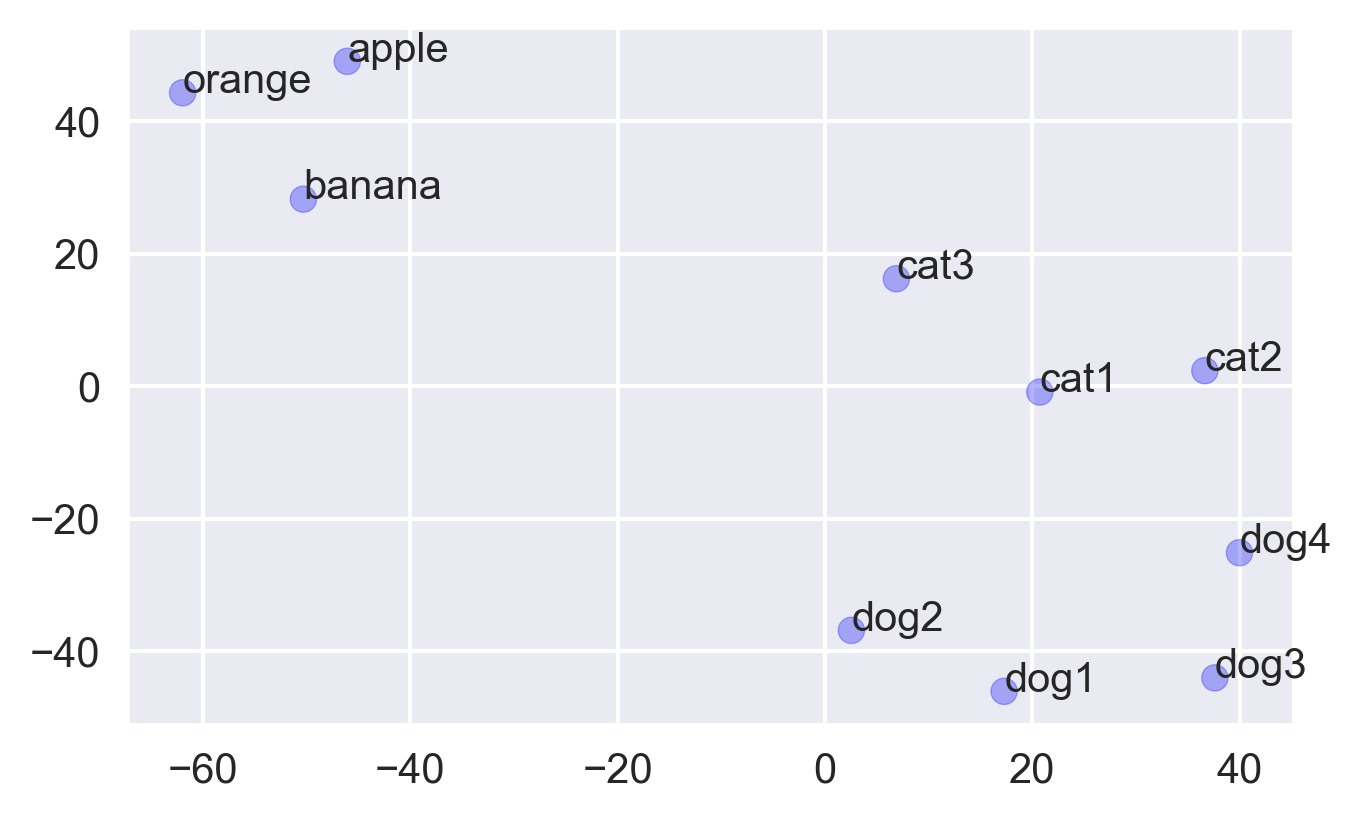

In [12]:
plot_embedding_distribution(np.array([x[2] for x in embeddings]), None, None, [label[0] for label in embeddings])

### Mixing natural language and images to find similarity
As mentioned earlier in this notebook. The ```clip-ViT-B-32``` model maps text and images to the same vector space. This allows us to match sentences to text and vice versa. So we can simply ask the model to encode a sentence into an embedding and use this to find the similarity between the sentence and the words. This is where the real power of Transformers comes into play we can use natural language to help us find similarities between objects. In this case, we've used images to make it easier to visualise but it could be any type of object if the model is trained to work with them.

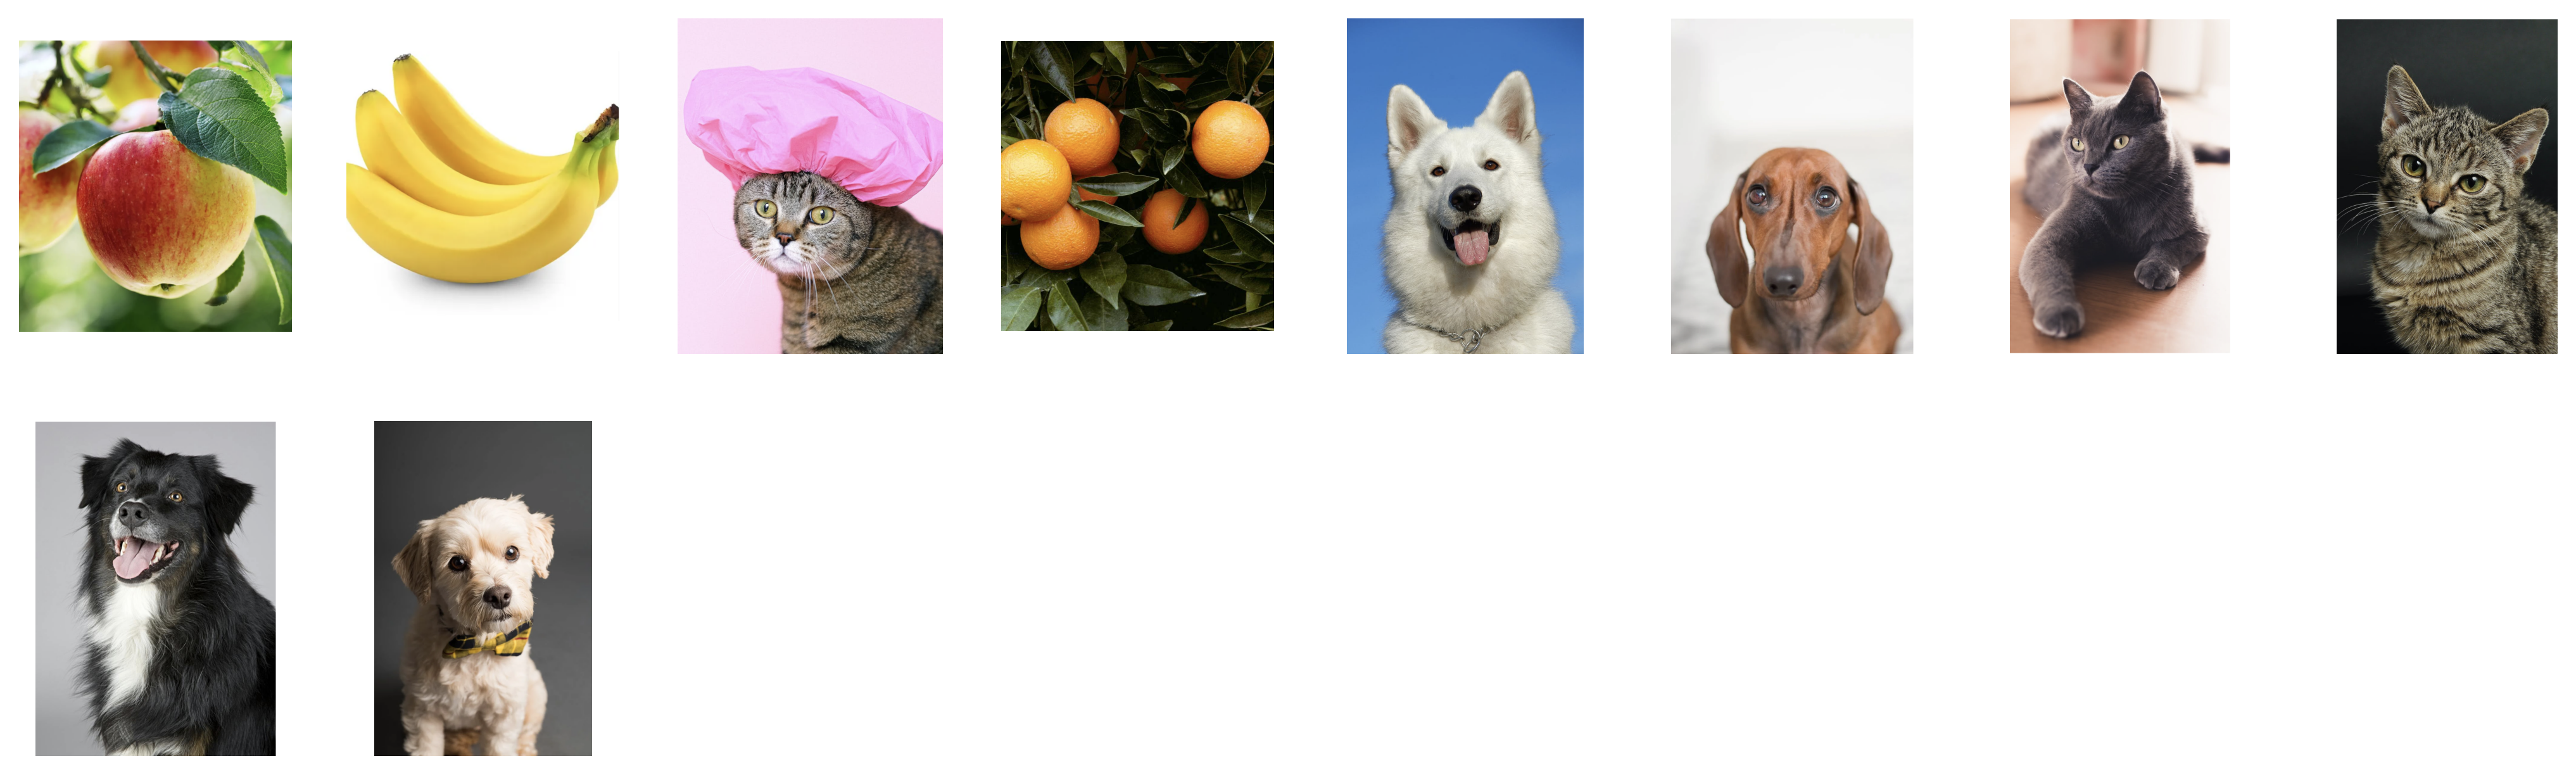

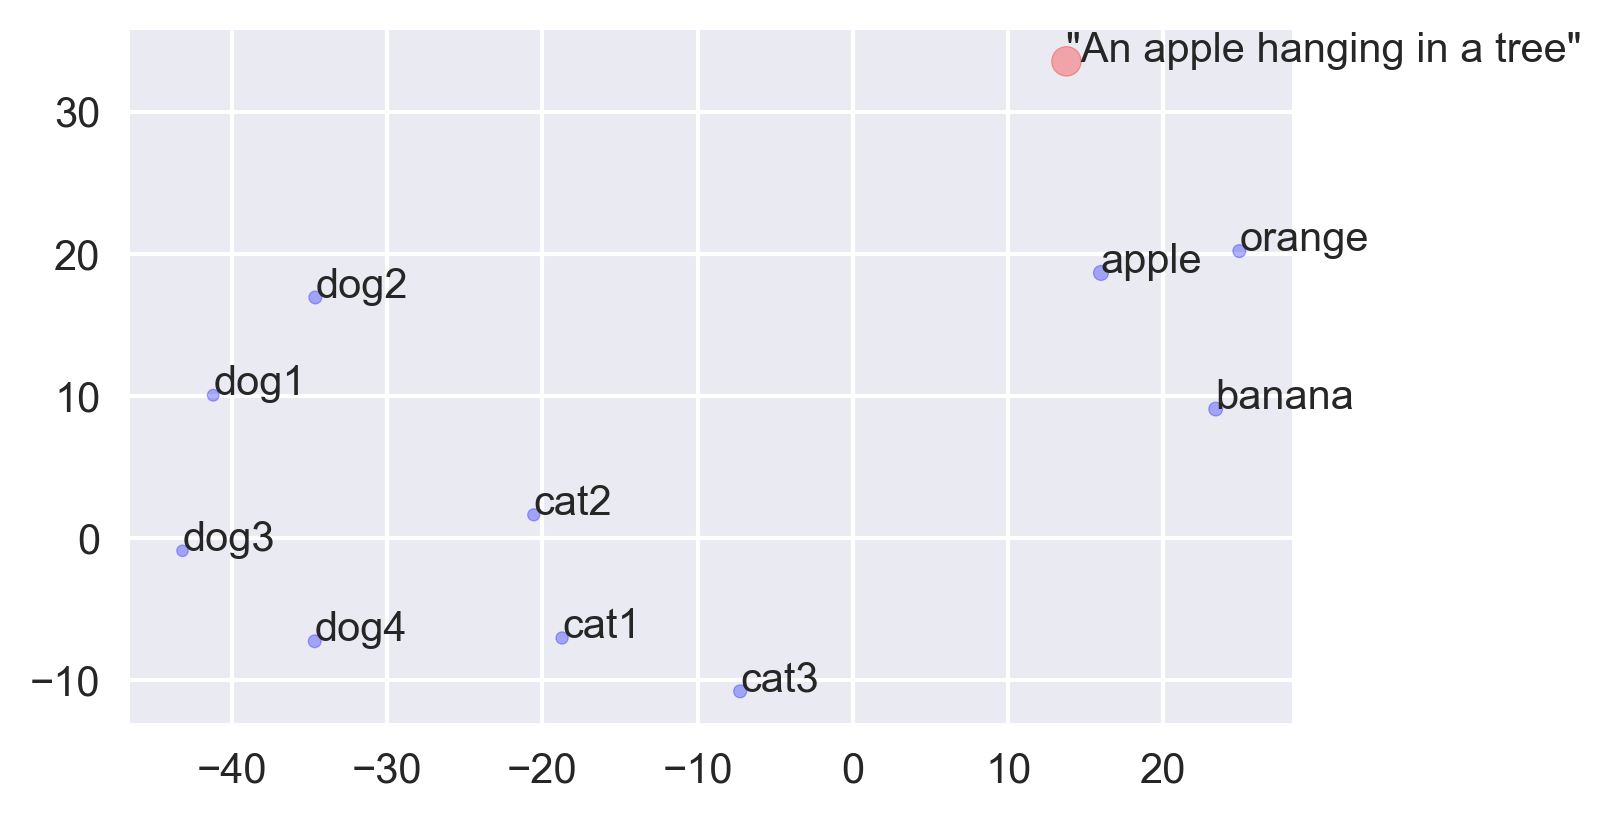

In [15]:
# search = 'fruit in a tree'
# search = 'pointy eared animal'
search = 'An apple hanging in a tree'
# search = 'A pink hat wearing cat'
# search = 'a white dog in a bow tie'
# search = 'cats'

search_embedding = model.encode(search)

results = []
for e in embeddings:
    results.append([e[0], e[1], util.cos_sim(search_embedding, e[2]).item()])
results.sort(key=lambda e : e[2], reverse=True)

image_grid([x[1] for x in results])

plot_embedding_distribution(np.array([x[2] for x in embeddings]), search, search_embedding, [label[0] for label in embeddings])